In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dx=pd.read_excel("data.xlsx",sheet_name=4).set_index("Kx")
dy=pd.read_excel("data.xlsx",sheet_name=5).set_index("Yx")
dx,dy

(     X      I    R       U        Xd
 Kx                                  
 10  47  0.215  220   47.30  1.419000
 20  49  0.450  220   99.00  2.848776
 50  49  1.151  220  253.22  7.286535,
       Y       V        Yd
 Yx                       
 10   34   24.92  1.033447
 20   32   44.60  1.965187
 50   46  126.71  3.883937
 100  20  138.50  9.764250)

In [3]:
d=pd.read_excel("data.xlsx",sheet_name=3)
d

,Unnamed: 0,2Xs,Kx,2Ys,Ky,2Xc,Kx.1,2Yc,Ky.1
0,1,32.0,20,19,100,31.0,20.0,18.0,100.0
1,2,23.0,20,19,100,NaN,NaN,NaN,NaN
2,3,14.0,20,18,100,NaN,NaN,NaN,NaN
3,4,7.0,20,12,100,NaN,NaN,NaN,NaN
4,5,6.8,20,10,100,NaN,NaN,NaN,NaN
5,6,13.0,10,10,50,NaN,NaN,NaN,NaN
6,7,12.8,10,4,50,NaN,NaN,NaN,NaN
7,8,11.0,10,2,50,NaN,NaN,NaN,NaN


In [4]:
d.iloc[0]

Unnamed: 0      1.0
2Xs            32.0
Kx             20.0
2Ys            19.0
Ky            100.0
2Xc            31.0
Kx.1           20.0
2Yc            18.0
Ky.1          100.0
Name: 0, dtype: float64

In [15]:
def H(I,N0,L):
    return I*N0/L

def B(U,S,N,tau):
    return U*tau/(S*N)

def getParam(dat,params):
    N0,N,S,L=params
    Hs=H(dat["2Xs"]*dx.at[dat["Kx"],"Xd"]/220,N0,L)
    Bs=B(dat["2Ys"]*dy.at[dat["Ky"],"Yd"]/1000,S,N,0.4)
    #print("H",Hs)
    #print("B",Bs)
    return np.array([Hs,Bs])

def getParam2(dat,params):
    N0,N,S,L=params
    print("Hc",H(dat["2Xc"]*dx.at[dat["Kx.1"],"Xd"]/220,N0,L))
    print("Bc",B(dat["2Yc"]*dy.at[dat["Ky.1"],"Yd"]/1000,S,N,0.4))

def getParams(dat,params):
    N0,N,S,L=params
    return np.transpose(np.array([getParam(dat.iloc[i],params) for i in dat.index]).reshape(-1,2))

In [6]:
d.index

RangeIndex(start=0, stop=8, step=1)

In [7]:
getParam(d.iloc[0],[40,200,3.8/1e4,24/100])
getParam2(d.iloc[0],[40,200,3.8/1e4,24/100])

Hc 33.4515306122449
Bc 0.4625171052631579


[[3.48068571e+01 2.50174286e+01 1.52280000e+01 7.61400000e+00
  7.39645714e+00 7.04340000e+00 6.93504000e+00 5.95980000e+00]
 [3.09201250e-01 3.09201250e-01 2.92927500e-01 1.95285000e-01
  1.62737500e-01 6.47322826e-02 2.58929130e-02 1.29464565e-02]]


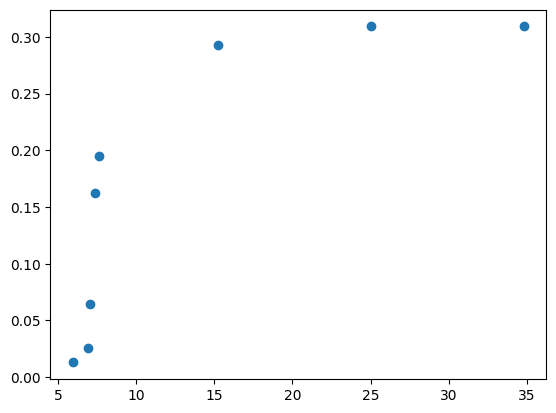

In [8]:
p=getParams(d,[42,400,3/1e4,25/100])
print(p)
plt.scatter(p[0],p[1])

In [9]:
def f(x,a1,a2,b1,b2):
    return a1*x+a2*x*x/(1+b1*x+b2*x*x)

In [10]:
pip install -U symfit numpy==1.25

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


OrderedDict([('a1', 0.0030092685420916297), ('a2', 0.0007693715444396376), ('b1', -0.11799648554620104), ('b2', 0.006431851078544893)])


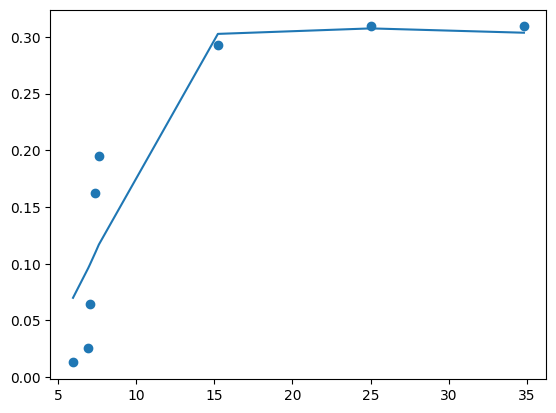

In [11]:
from symfit import parameters, variables, exp, Fit
import numpy as np

a1, a2, b1, b2 = parameters('a1, a2, b1, b2')
x, y = variables('x, y')
model = {a1*x+a2*x*x/(1+b1*x+b2*x*x)}

fit = Fit(model, p[0], p[1])
fit_result = fit.execute()
print(fit_result.params)
a1=fit_result.value(a1)
a2=fit_result.value(a2)
b1=fit_result.value(b1)
b2=fit_result.value(b2)
plt.scatter(p[0],p[1])
plt.plot(p[0],f(p[0],a1,a2,b1,b2))

In [15]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, p[0], p[1])
popt, pcov

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [12]:

ps=[
    [42,400,3/1e4,25/100],
    [20,200,2/1e4,11/100],
    [40,200,3.8/1e4,24/100],
]

[228.13477714   0.22927187]
Hc 27.09
Bc 0.10334470588235294
0.00026161496712466894 0.0027819999472853737
[277.00875696   0.68781562]
Hc 60.219294990723554
Bc 0.294778125
0.000815846274978279 0.015363261437908497
[69.06122449  0.976425  ]
Hc 66.9030612244898
Bc 0.9250342105263158
-0.0 0.5402530511756429


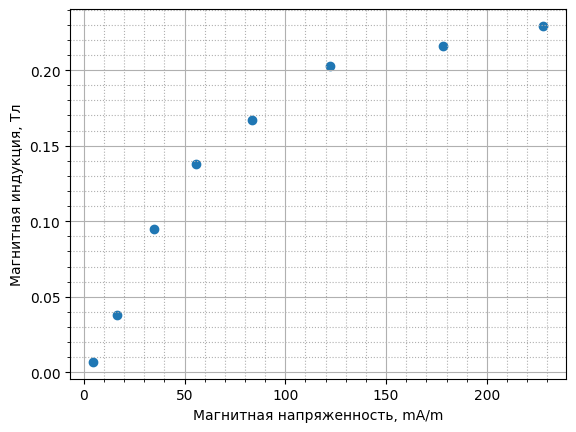

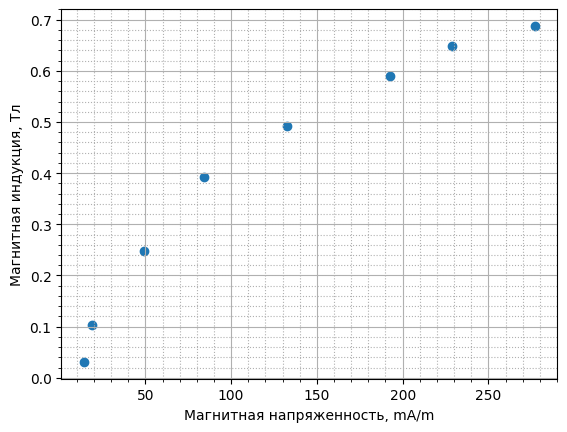

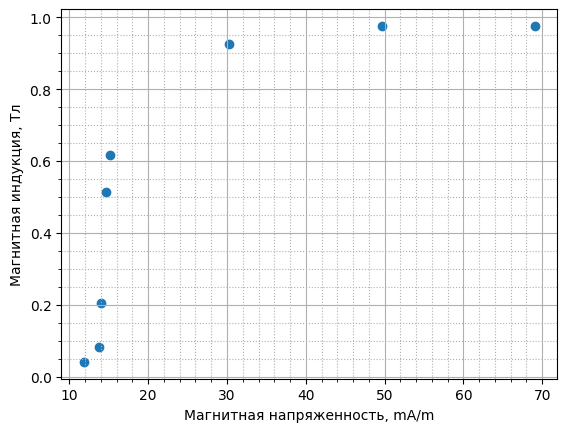

In [16]:
for i in range(1,4):
    d=pd.read_excel("data.xlsx",sheet_name=i)
    print(getParam(d.iloc[0],ps[i-1]))
    getParam2(d.iloc[0],ps[i-1])
    p=getParams(d,ps[i-1])
    g=np.gradient(p[1],p[0])
    print(g[0],np.max(g))
    fig,ax=plt.subplots()
    ax.scatter(p[0],p[1])
    ax.minorticks_on()
    ax.grid(which='major')
    ax.grid(which='minor', linestyle=':')
    ax.set_ylabel("Магнитная индукция, Тл")
    ax.set_xlabel("Магнитная напряженность, mA/m")
    fig.savefig(f"{i}.eps")